In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
conn = sqlite3.connect('../db/walmart.db')
df = pd.read_sql('Select * FROM walmart_sales', conn, parse_dates =['Date'])
conn.close()
df.head()


DatabaseError: Execution failed on sql 'Select * FROM walmart_sales': no such table: walmart_sales

In [ ]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

<Axes: title={'center': 'Total Weekly Sales Over Time'}, xlabel='Date'>

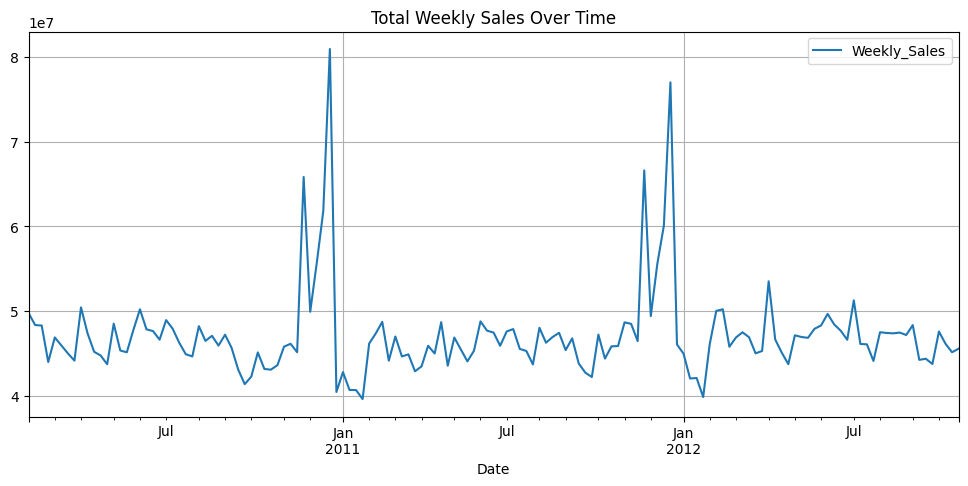

In [ ]:
#
ts = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
ts.plot(
    x='Date',
    y='Weekly_Sales',
    figsize=(12,5),
    grid = True,
    title= 'Total Weekly Sales Over Time'
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '20'),
  Text(1, 0, '4'),
  Text(2, 0, '14'),
  Text(3, 0, '13'),
  Text(4, 0, '2'),
  Text(5, 0, '10'),
  Text(6, 0, '27'),
  Text(7, 0, '6'),
  Text(8, 0, '1'),
  Text(9, 0, '39')])

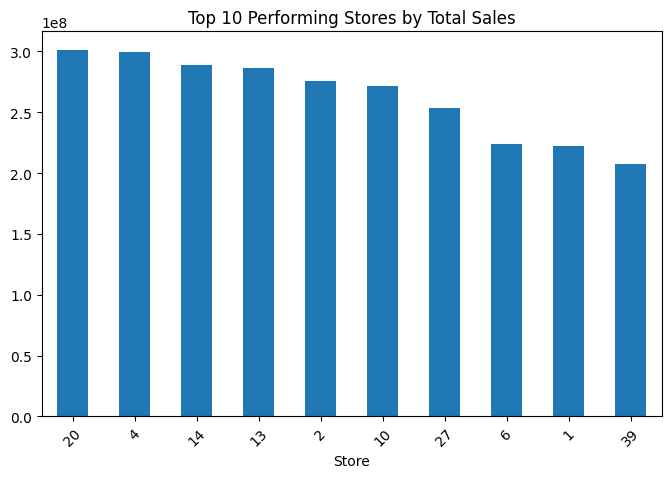

In [ ]:
# top 10 stores by total stores (heavy hitters)
top10_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
top10_stores.plot(
    kind ='bar',
    figsize =(8,5),
    title='Top 10 Performing Stores by Total Sales'
)
plt.xticks(rotation = 45)